>  This is logistic Regression :  
    Most basic form

In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function 
#print('Print function from python 3')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

In [2]:
# Import Logistic regression libraries
from sklearn.linear_model import LogisticRegression

>  **Load the data**

In [3]:
X_train =pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv',header=None)

In [8]:
logistic = LogisticRegression(penalty='l2')

In [9]:
logistic_model=logistic.fit(X_train, y_train.values.ravel())

In [10]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

In [11]:
y_test=pd.read_csv('y_test.csv',header=None)
X_test=pd.read_csv('X_test.csv')

In [12]:
logistic_model.score(X_test, y_test)

0.9493350221659278

In [13]:
pred = logistic_model.predict(X_test)

In [14]:
# Display confusion matrix for y_test and pred
print( confusion_matrix(y_test, pred) )

[[2082   32]
 [ 128  916]]


In [15]:
# Predict PROBABILITIES using regularized logistic regression
pred_prob = logistic_model.predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
pred[:10]

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


[1.0,
 2.896042986457408e-05,
 1.6916837148905495e-26,
 0.9954348810997714,
 0.322315722755395,
 0.23953038718030442,
 0.4896472719247633,
 0.026422744835688846,
 0.8227573918342975,
 8.876775662661838e-65]

In [16]:
# Classification metrics 
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)

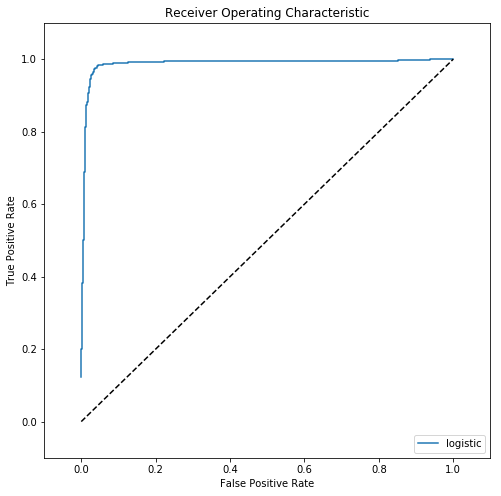

In [17]:
# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='logistic')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
auc(fpr, tpr)

0.9874192121851404

>  Conclusion :    
     - Need to introduce regularization  
     - Need to introduce Standard Scalar

In [24]:
# For standardization
from sklearn.preprocessing import StandardScaler

In [25]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

In [26]:
# Pipeline dictionary
pipelines = {
    'l1' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l1' , random_state=123)),
    'l2' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l2' , random_state=123))
}

In [27]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [28]:
# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
}

l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
}

In [29]:
# Create hyperparameters dictionary
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters
}

In [ ]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train.values.ravel())
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')